# Project: Melbourne Listing Price Analysis

![image](https://cdn-images-1.medium.com/max/800/1*cf6LI9ED2zgT6DHZbmhDbQ.jpeg)

### Table of Contents
<ul>
    <li><a href = "#intro">Introduction</a></li>
    <li><a href = "#gather">Data Gathering</a></li>
    <li><a href = "#assess">Data Assessment</a></li>
    <li><a href = "#clean">Data Cleaning</a></li>
    <li><a href = "#analysis">Data Analysis and Visualization</a></li>
     <ul>
        <li><a href="#univar">Univariate Analysis</a></li> 
        <li><a href="#bivar">Bivariate Analysis</a></li>
        <li><a href="#multivar">Multivariate Analysis</a></li>
    </ul>
    <li><a href = "#conclude">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I explored the prices of listings in Melbourne. My problem statement is that I am a data analyst working for a real estate company looking to break into the Melbourne listing market and they would like to understand the drivers of listing price in Melbourne. My analysis therefore focused on how certain variables affected the prices of listings.

The data was messy and therefore I performed some data cleaning to make the data more fit for purpose.

I leveraged statitical tests like Pearson Product-Moment Correlation Coefficient, Oneway ANOVA and Independent t-test to validate my findings.

I explored the variables individually and continued with pairwise analysis.

At the end of the analysis I discovered the drivers of listing price in Melbourne that would help the real estate company make data driven decisions with regards to pricing their listings.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

<a id='gather'></a>
## Data Gathering

In [2]:
# import data into dataframe
df = pd.read_csv('melb_data.csv')
# set option to display all columns
pd.set_option('display.max_columns', None)

In [3]:
# display first 5 rows of dataframe
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
# display last 5 rows of dataframe
df.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
13579,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,3013.0,4.0,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


From visual assessment of the first 5 and last 5 rows, I can identify some null values in the dataset. Some columns also have a decimal of 0 even though they are not supposed to. I will perform programmatic assessment to identify more data issues and clean them.

<a id='assess'></a>
## Data Assessment

In [5]:
# check shape of dataframe
df.shape

(13580, 21)

Dataframe has 13580 rows and 21 columns. Next, I will display information on the 21 columns

In [6]:
# display column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

There appears to be some null values in the dataframe. This will be investigated.

The datatype of some columns are not right.
* `YearBuilt`, `Bedrooom2`, `Bathroom` and `Car` should be `int`
* `Date` should be `datetime`
* `Postcode`, `Lattitude` and `Longtitude` should be `object`


There are some issues with the column labels as well.
* The column label `Bedroom2` is inconsistent with the rest. 
* The column labels, `Lattitude` and `Longtitude` are misspelt.
* `SellerG` and `Car` are not descriptive of the values in the columns

There are some inconsistencies in the column labelling as well. These will be cleaned later on.

Now I will display summary statistics on the numeric columns.

In [7]:
# display summary stats
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


Some columns appear here even though their values do not have any numeric value. This is because of the wrong datatypes. These datatypes were identified earlier and will be changed.

Now I will check for missing values.

In [8]:
# check for null values in columns
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

There are missing values in the `Car`, `Building Area`, `YearBuilt` and `Council Area` columns. Based on the distribution of values in these columns, the missing values will be imputed or dropped.

Now I will check for duplicates.

In [9]:
# check for duplicates
df.duplicated().sum()

0

There are no duplicates in the data.

Now I will check the unique values in the `object` columns for any incosistencies.

In [10]:
# list of columns
columns = ['Suburb','Type','Method','SellerG','CouncilArea','Regionname']
# iterate through list
for col in columns:
    # get unique values in column
    x = df[col].unique()
    # print statement and unique values
    print(f'Unique values in {col}: {x}\n')

Unique values in Suburb: ['Abbotsford' 'Airport West' 'Albert Park' 'Alphington' 'Altona'
 'Altona North' 'Armadale' 'Ascot Vale' 'Ashburton' 'Ashwood'
 'Avondale Heights' 'Balaclava' 'Balwyn' 'Balwyn North' 'Bentleigh'
 'Bentleigh East' 'Box Hill' 'Braybrook' 'Brighton' 'Brighton East'
 'Brunswick' 'Brunswick West' 'Bulleen' 'Burwood' 'Camberwell'
 'Canterbury' 'Carlton North' 'Carnegie' 'Caulfield' 'Caulfield North'
 'Caulfield South' 'Chadstone' 'Clifton Hill' 'Coburg' 'Coburg North'
 'Collingwood' 'Doncaster' 'Eaglemont' 'Elsternwick' 'Elwood' 'Essendon'
 'Essendon North' 'Fairfield' 'Fitzroy' 'Fitzroy North' 'Flemington'
 'Footscray' 'Glen Iris' 'Glenroy' 'Gowanbrae' 'Hadfield' 'Hampton'
 'Hampton East' 'Hawthorn' 'Heidelberg Heights' 'Heidelberg West'
 'Hughesdale' 'Ivanhoe' 'Kealba' 'Keilor East' 'Kensington' 'Kew'
 'Kew East' 'Kooyong' 'Maidstone' 'Malvern' 'Malvern East' 'Maribyrnong'
 'Melbourne' 'Middle Park' 'Mont Albert' 'Moonee Ponds' 'Moorabbin'
 'Newport' 'Niddrie' 'Nor

There are formatting inconsistencies in the `SellerG` column.

### Data Issues
* Wrong datatypes
* Misspelt column labels
* Incosistent column labelling
* Missing Values

Before cleaning these issues, I will make a copy of the dataframe.

In [11]:
# copy dataframe
clean_df = df.copy()
# confirm copy
clean_df.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


I have successfully created a copy of the dataframe and named it `clean_df`. I will clean the data issues on this dataframe and use it for data analysis.

<a id='clean'></a>
## Data Cleaning

#### Issue
* Missing values

##### Define
* Check distribution of columns with missing values and impute or drop rows or columns with missing values

##### Code


###### `Car` column

In [12]:
# print statement
print('Percentage of missing values')
# list of columns
columns = ['Car','YearBuilt','BuildingArea','CouncilArea']
# iterate through columns
for col in columns:
    # calculate percentage of missing values
    missing_cent = clean_df[col].isnull().sum()/clean_df.shape[0] * 100
    print('{}: {:.2f}\n'.format(col,missing_cent))

Percentage of missing values
Car: 0.46

YearBuilt: 39.58

BuildingArea: 47.50

CouncilArea: 10.08



The percentage of missing values in `YearBuilt` and `BuildingArea` are quite high, 40% and 48% respectively. Given these high values, I will delete these columns from the dataframe.The `CouncilArea` column will also not be relevant to my analysis therefore I will drop it as well.

Given the small number of missing values in the `Car` column, I will drop the rows with the missing values.

In [13]:
# drop columns
clean_df.drop(columns=['YearBuilt','BuildingArea','CouncilArea'],inplace=True)

In [14]:
# delete rows with missing values
clean_df.dropna(axis=0,inplace=True)

##### Test

In [15]:
# check for missing values
clean_df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

All null values have been handled.

#### Issue:
* Wrong datatypes

**NB:** The `YearBuilt` column had a wrong datatype but it has been dropped

##### Define
* Convert dataype of `Bedroom2`, `Bathroom` and `Car` to `int`
* Convert datatype of `Date` to `datetime`
* Convert datatype of `Postcode`,`Lattitude` and `Longtitude` to `object`

##### Code

I will define a function that changes the datatype of columns in a list

In [19]:
# define function
def dtype_changer(columns,dtype):
    '''Converts the datatype for a list of columns to another datatype
    
    INPUT:
    columns: list of columns
    dtype: datatype to be used in conversion'''
    # iterate through list
    for col in columns:
        # change datatype
        clean_df[col] = clean_df[col].astype(dtype)

Using this function, I will perform the datatype conversion

In [20]:
# list of columns to be converted
columns = ['Bedroom2','Bathroom','Car']
# convert dtype to int
dtype_changer(columns,'int')

In [21]:
# list of columns to be converted
columns = ['Postcode','Lattitude','Longtitude']
# convert dtype to object
dtype_changer(columns,'object')

In [23]:
# convert dtype to datetime
clean_df['Date'] = pd.to_datetime(clean_df['Date'],infer_datetime_format=True)

##### Test

In [24]:
# check dtype of columns
clean_df.dtypes

Suburb                   object
Address                  object
Rooms                     int64
Type                     object
Price                   float64
Method                   object
SellerG                  object
Date             datetime64[ns]
Distance                float64
Postcode                 object
Bedroom2                  int32
Bathroom                  int32
Car                       int32
Landsize                float64
Lattitude                object
Longtitude               object
Regionname               object
Propertycount           float64
dtype: object

Datatypes have been changed.

#### Issues:
* Misspelt column labels
* Inconsistent column labelling
* Non-descriptive column labels

##### Define
* Rename columns

##### Code

In [25]:
# old and new column labels 
col_labels = {'SellerG':'AgentName',
              'Postcode':'PostCode',
              'Bedroom2':'Bedroom',
              'Landsize':'LandSize',
              'Lattitude':'Latitude',
              'Longtitude':'Longitude',
              'Regionname':'RegionName',
              'Car':'CarSpots',
              'Propertycount':'PropertyCount'}
# rename column labels
clean_df.rename(columns=col_labels,inplace=True)

##### Test

In [26]:
# display columns
clean_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'AgentName',
       'Date', 'Distance', 'PostCode', 'Bedroom', 'Bathroom', 'CarSpots',
       'LandSize', 'Latitude', 'Longitude', 'RegionName', 'PropertyCount'],
      dtype='object')

The column labels are now correctly spelt, descriptive and consistent.

Before moving on to analyze the data, I will drop some columns that will not be relevant to the analysis.

In [27]:
# columns to drop
irr_cols = ['Address','AgentName','PostCode','Latitude','Longitude','Date']
# drop irrevelant columns
clean_df.drop(columns=irr_cols,inplace=True)

In [28]:
# display columns
clean_df.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'Distance', 'Bedroom',
       'Bathroom', 'CarSpots', 'LandSize', 'RegionName', 'PropertyCount'],
      dtype='object')

Irrelevant columns have been successfully dropped. Now I will move on to data analysis.

<a id='analysis'></a>
## Data Analysis

<a id='univar'></a>
### Univariate Analysis

#### `Price`

Prices of listings

In [29]:
# convert figures to 2 decimal places
pd.set_option('display.float_format',lambda x : f'{x:.2f}')
# display summary stats of price column
clean_df['Price'].describe()

count     13518.00
mean    1074796.40
std      639858.56
min       85000.00
25%      650000.00
50%      901000.00
75%     1328000.00
max     9000000.00
Name: Price, dtype: float64

I will plot the distribution of prices on a histogram. As I will be using this histogram for other distributions, I will create a function that plots the histogram and adds other features.

In [63]:
# define function
def hist_plotter(df,x,title,xlabel,tick=None,label=None):
    '''plots a histogram
    
    INPUT:
    df: dataframe
    x: column to be plotted
    tick: tuple to be used as ticks
    label: tuple to be used as tick labels
    title: title of plot
    xlabel: xlabel'''
    # plot histogram
    plt.hist(data=df,x = x)
    # set xtixks
    plt.xticks(
        ticks=tick,
        labels=label)
    # add title
    plt.title(title)
    # set xlabel
    plt.xlabel(xlabel)
    # set ylabel
    plt.ylabel('Frequency')

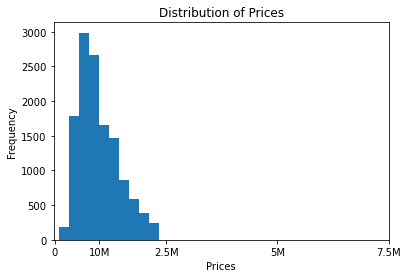

In [64]:
hist_plotter(df = clean_df,
             x = 'Price',
             tick = (0,2500000,5000000,7500000,1000000),
             label = ('0','2.5M','5M','7.5M','10M'),
             title = 'Distribution of Prices',
             xlabel = 'Prices')

There appears to be outliers in the data. I will check for these outliers using the inter-quartile range method.

In [81]:
# define function
def outlier_checker(column):
    '''prints the low and upper boundary of outliers in a column
    
    INPUT:
    column: column in dataframe'''
    # calculate first and third quartile
    q1, q3= np.percentile(clean_df[column],[25,75])
    # calculate interquartile range
    iqr = q3 - q1
    # calculate lower boundary
    low_bound= q1 - (iqr * 1.5)
    print(f' lower bound = {low_bound}')
    # calculate high boundary
    upper_bound= q3 + (iqr * 1.5)
    print(f' Upper bound = {upper_bound}')

In [82]:
# check outlier boundaries
outlier_checker('Price')

 lower bound = -302500.0
 Upper bound = 2197500.0


Since there are no negative prices in the data, I will check for outliers using the upper boundary.

In [36]:
# checking for outliers
x = clean_df.query('Price >= 2345000').count()[0]
# calculate percentage of outliers
out_per = x/clean_df.shape[0] * 100
# print statement
print('Percentage of outliers: {:.2f}'.format(out_per))

Percentage of outliers: 4.62


4.62% of the prices are outliers. Given the small percentage, I will delete these outliers from the dataframe 

In [37]:
# drop outliers
clean_df.drop(clean_df.query('Price >= 2345000').index,inplace=True)

In [38]:
# confirm drop
clean_df.query('Price >= 2345000').count()[0]

0

Outliers have been dropped. I will plot the distribution again.

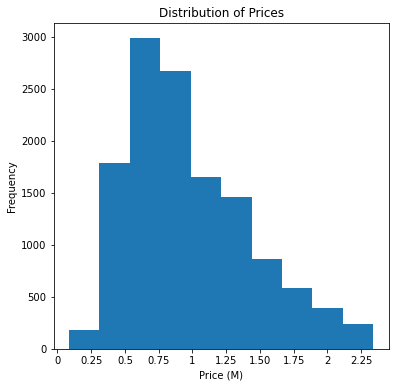

In [65]:
# set figure size
plt.figure(figsize=(6,6))
# plot histogram
hist_plotter(df = clean_df,
             x = 'Price',
             tick = (0,250000,500000,750000,1000000,1250000,1500000,1750000,2000000,2250000),
             label = ('0','0.25','0.5','0.75','1','1.25','1.50','1.75','2','2.25'),
             title = 'Distribution of Prices',
             xlabel = 'Price (M)')

The distribution is right skewed with majority of the values falling between 0.5M and 1.5M.

##### `Rooms`

Number of rooms a listing had

In [41]:
# value counts of room column
clean_df['Rooms'].value_counts()

3     5723
2     3607
4     2378
1      677
5      437
6       56
7        7
8        7
10       1
Name: Rooms, dtype: int64

Most of the values fall between 1 and 5 therefore I will delete values greater than 5 from the dataframe.

In [45]:
# drop rows
clean_df.drop(clean_df.query('Rooms >= 6').index,inplace=True)

After dropping the rows, I will now plot the distribution. Because the numbers are discrete I will use Seaborn's countplot instead of a histogram. I will be plotting the countplot for other variables,therefore I will create a function.

In [42]:
# define function
def count_plotter(xvalue,title,xlabel,ylabel = 'No. of Listings',colors=None):
    '''Plots a countplot with title,xlabel and ylabel'''
    # plot countplot
    sns.countplot(data=clean_df,x=xvalue,color=colors)
    # add title
    plt.title(title)
    # set xlabel
    plt.xlabel(xlabel)
    # set ylabel
    plt.ylabel(ylabel)

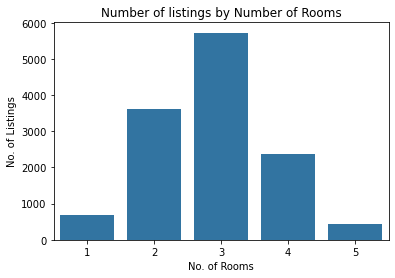

In [46]:
# set base color
base_color = sns.color_palette()[0]
# plot countplot
count_plotter(xvalue = 'Rooms',
             title = 'Number of listings by Number of Rooms',
             xlabel = 'No. of Rooms',
             colors = base_color)

Majority of the houses listed had between 2 to 4 rooms with a mode of 3 rooms.


##### `Type`

Type of listing

In [49]:
# check value counts
clean_df['Type'].value_counts()

h    8709
u    3010
t    1103
Name: Type, dtype: int64

**NB:** Per the metadata,
* h - house, cottage,villa,semi,terrace
* u - unit,duplex
* t - townhouse

For simplicity, I will replace h with house, u with unit and t with townhouse.

In [55]:
# replace column values
clean_df['Type'].replace({'h':'house','u':'unit','t':'townhouse'},inplace=True)
# confirm change
clean_df['Type'].value_counts()

house        8709
unit         3010
townhouse    1103
Name: Type, dtype: int64

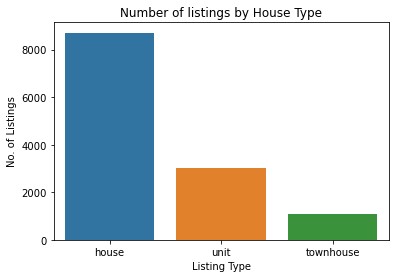

In [56]:
# plot countplot
count_plotter(xvalue = 'Type',
             title = 'Number of listings by Listing Type',
             xlabel = 'Listing Type')

There are three types of listings in Melbourne; houses, units,townhouses. Most of the listings are houses.

##### `Method`

Method or status of listing

In [57]:
# value counts of method column
clean_df['Method'].value_counts()

S     8568
SP    1653
PI    1445
VB    1067
SA      89
Name: Method, dtype: int64

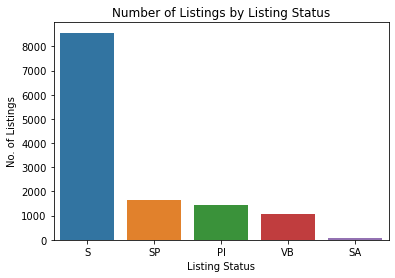

In [59]:
# plot countplot
count_plotter(xvalue='Method',
             title = 'Number of Listings by Listing Status',
             xlabel = 'Listing Status')

**NB:** Per the metadata:
* S - property sold
* SP - property sold prior
* PI - property passed in
* VB - vendor bid
* SA - sold after auction

From the countplot, it is evident most of the houses have been sold.

##### `Distance`

Distance of listing from central business district

In [60]:
# summary stats of column
clean_df['Distance'].describe()

count   12822.00
mean       10.25
std         5.93
min         0.00
25%         6.20
50%         9.40
75%        13.00
max        48.10
Name: Distance, dtype: float64

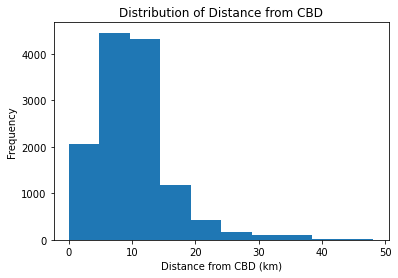

In [66]:
# plot histogram
hist_plotter(df=clean_df,
             x = 'Distance',
             title = 'Distribution of Distance from CBD',
             xlabel = 'Distance from CBD (km)')

CBD - Central Business District

The distribution of distance from the central business district is right skewed with majority of the values between 5km to 15km.

##### `Bedroom`

Number of bedrooms a listing has

In [40]:
# value counts of bedroom column
clean_df['Bedroom'].value_counts()

3     5725
2     3695
4     2284
1      686
5      412
0       15
9        2
8        1
7        1
20       1
Name: Bedroom, dtype: int64

Given that majority of the values fall between 1 to 5, and the values that fall outside this range are not much, I will delete the values that fall outside the range.

In [67]:
# drop rows
clean_df.drop(clean_df.query("Bedroom == 0 | Bedroom >= 6").index,inplace=True)
# confirm drop
clean_df.query("Bedroom == 0 | Bedroom >= 6").count()[0]

0

Values that fall outside the range of 1 to 5 have been removed. I will now plot the distribution.

In [70]:
# value counts
clean_df['Bedroom'].value_counts()

3    5725
2    3695
4    2284
1     686
5     412
Name: Bedroom, dtype: int64

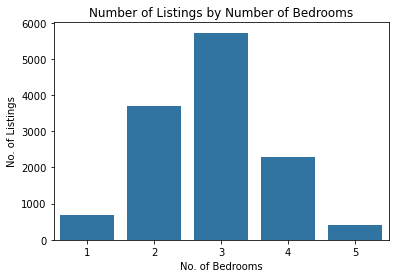

In [69]:
# plot count plot
count_plotter(xvalue = 'Bedroom',
             title = 'Number of Listings by Number of Bedrooms',
             xlabel = 'No. of Bedrooms',
             colors = base_color)

Most of the listings had 2,3 or 4 bedrooms with 3 bedrooms being the mode.

##### `Bathroom`

Number of bathrooms a listing has

In [44]:
# vlaue counts of bathroom column
clean_df['Bathroom'].value_counts()

1    7397
2    4648
3     682
4      32
0      28
5      13
6       2
Name: Bathroom, dtype: int64

I will delete the rooms with 6 bathrooms from the data since they are just 2

In [71]:
# drop rows
clean_df.drop(clean_df.query('Bathroom == 6').index,inplace=True)

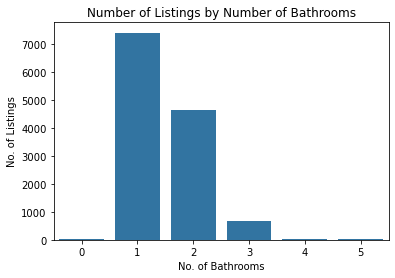

In [73]:
# plot countplot
count_plotter(xvalue='Bathroom',
             title='Number of Listings by Number of Bathrooms',
             xlabel='No. of Bathrooms',
            colors=base_color)

Most of the listings have between 1 to 3 bathrooms with 1 bathroom being the mode.


##### `CarSpots`

Number of car spots available

In [47]:
# value counts of car spots column
clean_df['CarSpots'].value_counts()

1     5421
2     5183
0      988
3      664
4      424
5       58
6       47
8        7
7        4
10       3
9        1
Name: CarSpots, dtype: int64

Majority of the car spots are between 0 and 6 therefore I will delete rows with values outside that range.

In [74]:
# drop rows
clean_df.drop(clean_df.query('CarSpots > 6').index,inplace=True)

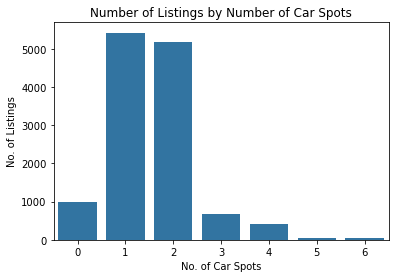

In [76]:
# plot countplot
count_plotter(xvalue = 'CarSpots',
              title='Number of Listings by Number of Car Spots',
              xlabel='No. of Car Spots',
              colors = base_color)

Most of the listings had 1 or 2 car spots.

##### `LandSize`

Land size of listing

In [77]:
# summar stats of column
clean_df['LandSize'].describe()

count   12785.00
mean      514.77
std      1502.97
min         0.00
25%       167.00
50%       412.00
75%       641.00
max     76000.00
Name: LandSize, dtype: float64

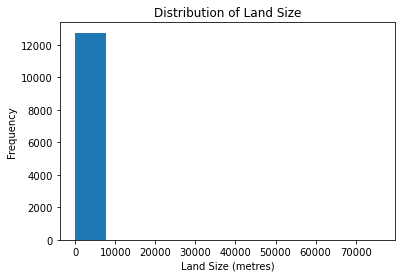

In [79]:
# plot histogram
hist_plotter(df=clean_df,
             x='LandSize',
             title = 'Distribution of Land Size',
             xlabel='Land Size (metres)')

There appears to be outliers in the landsize distribution. I will check for these outliers.

In [83]:
# check upper and lower bounds
outlier_checker('LandSize')

 lower bound = -544.0
 Upper bound = 1352.0


Given that there are no negative land sizes in the data, I will check for outliers using the upper bound.

In [50]:
# check number of outliers
clean_df.query('LandSize >= 1354').count()[0]

337

There are 337 outliers in the `LandSize` column. These outliers will be dropped.

In [85]:
# drop rows
clean_df.drop(clean_df.query('LandSize >= 1354').index,inplace=True)
# check for outliers
clean_df.query('LandSize >= 1354').count()[0]

0

Outliers have been dropped. I will now replot the histogram.

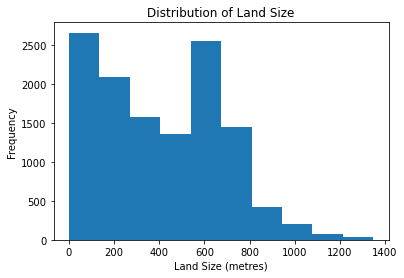

In [86]:
# plot histogram
hist_plotter(df=clean_df,
             x='LandSize',
             title = 'Distribution of Land Size',
             xlabel='Land Size (metres)')

The distribution of land size is bimodal. Majority of the listings have a land size of up to 800 metres squared.

###### `RegionName`

Region of listing

In [93]:
# value counts of column
regions = clean_df['RegionName'].value_counts().sort_values()
regions

Western Victoria                31
Northern Victoria               33
Eastern Victoria                47
South-Eastern Metropolitan     428
Eastern Metropolitan          1386
Western Metropolitan          2850
Northern Metropolitan         3700
Southern Metropolitan         3973
Name: RegionName, dtype: int64

I will plot the value counts on a horizontal bar chart. I will be plotting other horizontal bar charts later on therefore I will create a function that plots a horizontal bar chart.

In [110]:
# define function
def barh_plotter(data,title,xlabel,ylabel,tick=None,label=None):
    '''plots a horizontal bar chart'''
    plt.barh(data.index,data)
    plt.xticks(ticks=tick,labels=label)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

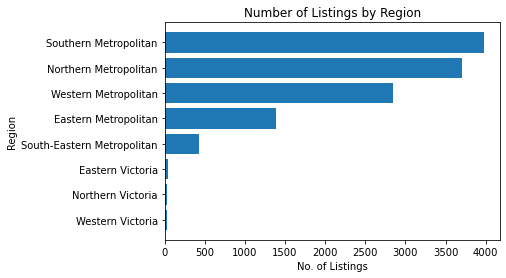

In [111]:
# plot horizontal bar chart
barh_plotter(data = regions,
             title='Number of Listings by Region',
             xlabel='No. of Listings',
             ylabel='Region')

Most of the listings were in the Southern Metropolitan, Nothern Metropolitan and Western Metropolitan areas with Southern Metropolitan having the highest number of listings.

##### `PropertyCount`

Number of properties that exist in a suburb

In [95]:
# summarys stats of property count column
clean_df['PropertyCount'].describe()

count   12448.00
mean     7451.50
std      4435.91
min       389.00
25%      4258.00
50%      6543.00
75%     10331.00
max     21650.00
Name: PropertyCount, dtype: float64

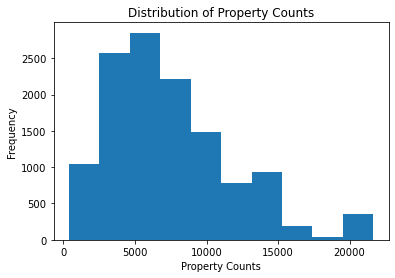

In [96]:
# plot histogram
hist_plotter(df=clean_df,
             x='PropertyCount',
             title='Distribution of Property Counts',
             xlabel='Property Counts')

Most of the listings were in suburbs with beween 2500 and 7500 properties.

<a id='bivar'></a>
### Bivariate Analysis

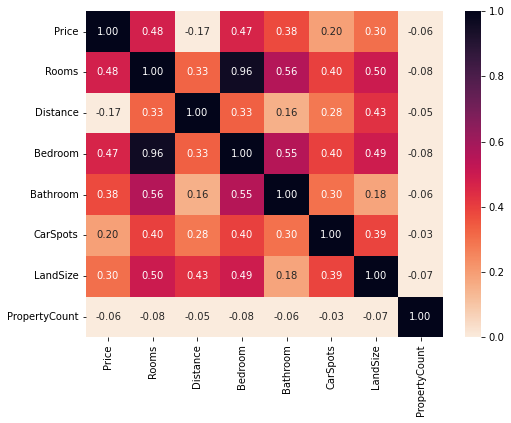

In [98]:
# list of numeric columns
numeric = ['Price','Rooms','Distance','Bedroom','Bathroom','CarSpots','LandSize','PropertyCount']
# set figure size
plt.figure(figsize=(8,6))
# plot correlation heatmap
sns.heatmap(clean_df[numeric].corr(),cmap='rocket_r',annot=True,fmt='.2f',vmin=0);

The variable of focus here is price and how it is influenced by the other numeric variables in the data. From the correlation heatmap, there seems to be a positive relationship between price and rooms, price and bedrooms, price and bathrooms and price and carspots even though these relationships appear weak.

There is also a weak negative relationship between distance and price. 

There is almost no linear relationship between price and landsize and price and propertycount.

It is not ideal to draw conclusions based on the correlation heatmap alone therefore I will use statistical tests to confirm or dispute the above.


### Hypotheses Testing

##### Choice of Statistical Test
The sets of variables to be tested are numeric and are measured on at least an interval scale. Also, the aim is to assess the relationship between the variables therefore the appropriate statistical test to use is the Pearson Product-Moment Correlation Coefficient (r).

##### Hypotheses
Because the test will be performed on price and each of the other variables, the hypotheses for price and each varible are:

Null Hypotheses: There is no relationship between price and the other variable

Alternative Hypotheses: There is a relationship between price and the variable

##### Decision Rules
I will be using a sample size of 300 across variables.

Given: 
* a 0.05 level of significance
* a two-tailed Pearson r test

df = n - 2 
 
   = 300 - 2
   
   = 298
   
The critical values for the test in the r-table are +- 0.112.

Therefore:

Retain H0 if -0.112 < r-obs < 0.112 and

Reject H0 if r-obs <= -0.112 or r-obs >= 0.112

##### Computation
I will compute for price against each of the numerical variables.

In [99]:
# list of numeric columns
variables = ['Rooms','Distance','Bedroom','Bathroom','CarSpots','LandSize','PropertyCount']
# iterate through list
for variable in variables:
    # take a sample of 300
    sample = clean_df.sample(300)
    # assign variable to x
    x = sample[variable]
    # assign variable to y
    y = sample['Price']
    # calculate correlation coefficient
    corr = np.corrcoef(x,y)
    # print statement
    print('Price & {}: {:.3f}\n'.format(variable,corr[0][1]))

Price & Rooms: 0.505

Price & Distance: -0.213

Price & Bedroom: 0.466

Price & Bathroom: 0.386

Price & CarSpots: 0.196

Price & LandSize: 0.321

Price & PropertyCount: -0.011



##### Decision

##### `Price` and `Rooms`
Since r-obs is greater than 0.112 the null hypotheses is rejected

##### `Price` and `Distance`
Since r-obs is less than -0.112, the null hypotheses is rejected 

##### `Price` and `Bedroom` 
Since r-obs is greater than 0.112, the null hypotheses is rejected

##### `Price` and `Bathroom`
Since r-obs is greater than 0.112, the null hypotheses is rejected

##### `Price` and `CarSpots`
Since r-obs is greater than 0.112, the null hypotheses is rejected

##### `Price` and `LandSize`
Since r-obs is greater than 0.112, the null hypotheses is rejected

##### `Price` and `PropertySize`
Since r-obs is greater than -0.112 but less than 0.112, the null hypotheses is retained


##### Interpretation

* There is indeed a positive relationship between price and rooms, price and bedroom, price and bathroom, price and carpsots, and price and landsize. However the relationship between price and carspots and price and landsize is a weak relationship while the others are medium.

* There is a weak negative relationship between price and distance.

* The weak relationship between price and property size is due to chance

##### `Type` and `Price`

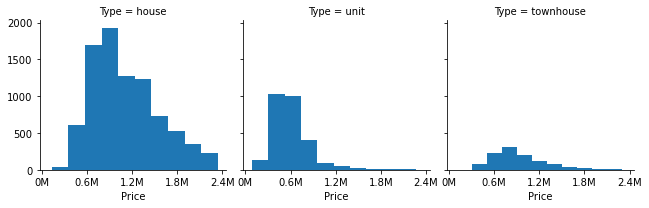

In [100]:
# plot facetgrid
g = sns.FacetGrid(data=clean_df,col = 'Type')
# plot histograms in facetgrid
g.map(plt.hist,'Price')
# set xticks
plt.xticks( 
    ticks=(0,600000,1200000,1800000,2400000),
    labels=('0M','0.6M','1.2M','1.8M','2.4M'));

Is the price of listing different across the different types? To answer this question, I will perform a statistical test.

Since there seems to be some slight positive skewness in the distribution of prices, I will check how skewed it is and make a decision on how to proceed.

In [62]:
# check skewness
clean_df['Price'].skew()

0.7963234342643897

The skewness is 0.80. I will transform the data using log transformation and compare the skewness. I will use the one with skewness closer to 0.

In [101]:
# log transformation
price_log = np.log(clean_df['Price'])
# check for skew
price_log.skew()

-0.17815352533036777

The skewness of the log transformation is -0.18. Even though it is negative, it is closer to 0. Therefore I will add the log transformation to the dataframe and use it for the statistical test. 

In [102]:
# add column to dataframe
clean_df['PriceLog'] = price_log

## Hypotheses Testing

##### Choice of Statistical Test
* The data includes 3 types of house listing that have been randomly sampled from the population. 
* The 3 types of houses are independent of each other. 
* The distribution is assumed to be normal. 
* The level of measurement for the dependent variable is at least interval.

Given these, the most appropriate statistical tests to use is the One-Way Analysis of Variance (One-Way ANOVA) or the Independent t-test. Given that there are only 3 categories, I will use the independent t test because I would have to perform post-hoc analysis if I use One-way ANOVA which will achieve the same objective as the independent t tests.

##### Statement of Hypotheses
For each pair of categories;

* Null hypotheses (H0) - There's no significant difference in price between the two categories

* Alternative hypotheses (H1) - There's a significant difference in price between the two categories


##### Decision Rules
I will use a sample of 100 od each category for each test.
df = n1 + n2 - 2

   = 100 + 100 - 2
   
   = 198
   
The critical value of t from the t table is +- 1.980

Therefore, if -1.980 < t-obs < 1.980, Retain H0 and

if t-obs <= -1.980 or t-obs <= 1.980, Reject H0

##### Computation

Because the test will be performed three times, I will create a function.

In [103]:
# define function
def ttest(type1,type2):
    '''performs an independent t test on two numeric variables'''
    # take sample of data
    sample1 = clean_df[clean_df['Type'] == type1].sample(100)
    sample2 = clean_df[clean_df['Type'] == type2].sample(100)
    # put samples in a list
    data = [sample1,sample2]
    # new dataframe with two samples joined
    samples = pd.concat(data,ignore_index = True)
    # perform independent t test
    results = stats.ttest_ind(samples['PriceLog'][samples['Type'] == type1],
                    samples['PriceLog'][samples['Type'] == type2])
    return results

In [105]:
# perform statistical test
ttest('house','unit')

Ttest_indResult(statistic=9.650737401822033, pvalue=2.6320655074979622e-18)

In [106]:
# perform statistical test
ttest('house','townhouse')

Ttest_indResult(statistic=4.74884308069637, pvalue=3.919657408480697e-06)

In [107]:
# perform statistical test
ttest('unit','townhouse')

Ttest_indResult(statistic=-8.41928928487755, pvalue=7.577938089607622e-15)

##### Decision

house and unit : t-obs (9.65) > 1.980, therefore the alternative hypotheses is retained

house and townhouse: t-obs (4.75) > 1.980, therefore the alternative hypotheses is retained

unit and townhouse: t-obs(-8.42) < -1.980, therefore the alternative hypotheses is retained

In all instances, the null hypotheses is rejected.

##### Interpretation
There's a significant difference in price between the various types of listings

I will now plot the mean price by type.

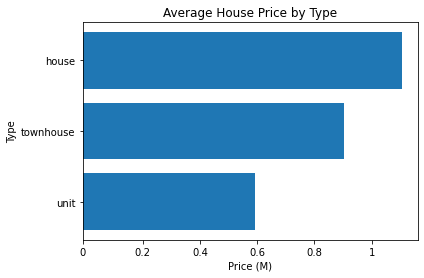

In [115]:
# find mean price by type
type_means = clean_df.groupby('Type')['Price'].mean().sort_values()
# plot horizontal bar chart
barh_plotter(data=type_means,
             title = 'Average House Price by Type',
             xlabel = 'Price (M)',
             ylabel = 'Type',
             tick = (0,210000,410000,610000,810000,1010000),
             label = ('0','0.2','0.4','0.6','0.8','1') )

On the average, houses cost more than units and townhouses. Units are the least expensive houses.

##### `Price` and `RegionName`

In [128]:
# get average listing price by region
region_price = clean_df.groupby('RegionName')['Price'].mean().sort_values()
region_price

RegionName
Western Victoria              387443.55
Northern Victoria             550121.21
Eastern Victoria              679233.66
Western Metropolitan          852508.84
Northern Metropolitan         876727.86
South-Eastern Metropolitan    886006.32
Eastern Metropolitan         1059167.85
Southern Metropolitan        1171758.96
Name: Price, dtype: float64

The are differences in the prices of listings in the different regions. To validate this, I will conduct a statistical test to ascertain that the differences is not due to chance.

## Hypotheses Testing

##### Choice of Statistical Test
* The data includes listings from 7 different regions that have been randomly sampled from the population. 
* The 7 different regions are independent of each other. 
* The distribution is assumed to be normal. 
* The level of measurement for the dependent variable is at least interval.

Given these, the most appropriate statistical test to use is the One-Way Analysis of Variance (One-Way ANOVA).

##### Statement of Hypotheses
* Null hypotheses (H0) - No significant difference exists among the three groups in terms of prices
* Alternative hypotheses (H1) - A significant difference exists between at least two of the groups in terms of prices

##### Decision Rules
df = [k - 1 , N - k]

   = [7 -1 , 1000 - 7]
   
   = [6 , 9993]
   
The critical value of F from the F table = 2.10

Therefore, if F-obs < 2.10, Retain H0 and

if F-obs >= 2.10, Reject H0

##### Computation

In [124]:
# take sample
sample = clean_df.sample(1000)

After taking the sample, I will check the distribution of the different regions in the sample.

In [125]:
# display value counts
sample['RegionName'].value_counts()

Southern Metropolitan         303
Northern Metropolitan         282
Western Metropolitan          252
Eastern Metropolitan          112
South-Eastern Metropolitan     37
Northern Victoria               6
Western Victoria                4
Eastern Victoria                4
Name: RegionName, dtype: int64

In [126]:
# calculate f statistic
stats.f_oneway(sample['PriceLog'][sample['RegionName'] == 'Southern Metropolitan'],
               sample['PriceLog'][sample['RegionName'] == 'Northern Metropolitan'],
               sample['PriceLog'][sample['RegionName'] == 'Western Metropolitan'],
               sample['PriceLog'][sample['RegionName'] == 'Eastern Metropolitan'],
               sample['PriceLog'][sample['RegionName'] == 'South-Eastern Metropolitan'],
               sample['PriceLog'][sample['RegionName'] == 'Western Victoria'],
               sample['PriceLog'][sample['RegionName'] == 'Northern Victoria'])

F_onewayResult(statistic=23.12698058542798, pvalue=1.217828737808155e-25)

##### Decision
Since F-obs(23.13) is greater than 2.10, the null hypotheses is rejected.

##### Interpretation
A significant difference in price exists amongst the listings in the various regions.

I could perform a post-how analysis to ascertain which means are significantly greater than the other but given the number of regions, and the f statistic confirming a significant difference in the means, I will rely on the means of the listings in the various regions to draw my conclusion.

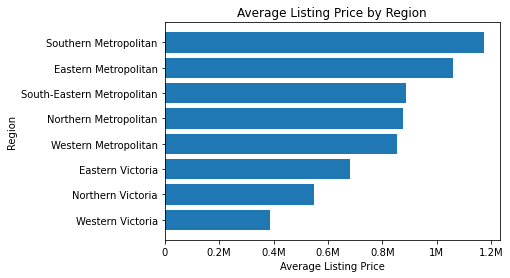

In [131]:
# plot horizontal bar chart
barh_plotter(data=region_price,
             title="Average Listing Price by Region",
             xlabel='Average Listing Price',
             ylabel='Region',
             tick=(0,200000,400000,600000,800000,1000000,1200000),
             label=('0','0.2M','0.4M','0.6M','0.8M','1M','1.2M'))

Generally, houses in the Metropolitan region are more expensive than houses in the Victoria region. Overall, the order of regions in terms of price of listing is;

* Southern Metropolitan
* Eastern Metropolitan
* South-Eastern Metropolitan
* Northern Metropolitan
* Western Metropolitan
* Eastern Victoria
* Northern Victoria
* Western Victoria

##### `Suburb` and `Price`

In [132]:
# number of unique values in column
clean_df['Suburb'].nunique()

308

Given the large number of unique values in the suburb column, I will only look at the top 20 and bottom 20 suburbs by average listing price.

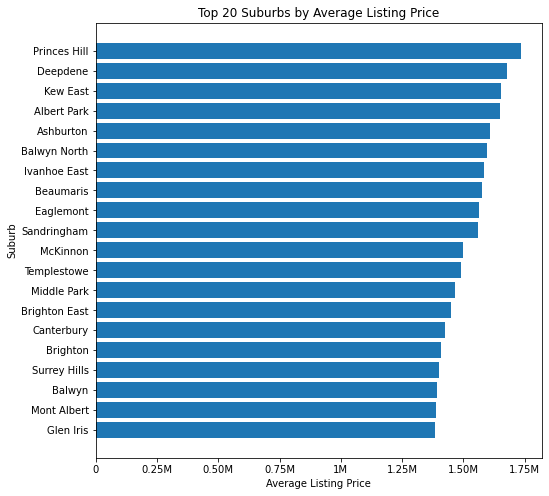

In [139]:
# get top 20 suburbs by average listing price
suburb_price = clean_df.groupby('Suburb')['Price'].mean().sort_values().tail(20)
# set figure size
plt.figure(figsize=(8,8))
# plot horizontal bar chart
barh_plotter(data=suburb_price,
             title='Top 20 Suburbs by Average Listing Price',
             tick = (0,250000,500000,750000,1000000,1250000,1500000,1750000),
             label = ('0','0.25M','0.50M','0.75M','1M','1.25M','1.50M','1.75M'),
             xlabel='Average Listing Price',
             ylabel='Suburb')

Doncaster East, Mont Albert, Glen Iris, Canterbury, Balwyn,
       Brighton, Surrey Hills, Brighton East, Middle Park, McKinnon,
       Ivanhoe East, Templestowe, Sandringham, Eaglemont, Beaumaris,
       Balwyn North, Ashburton, Albert Park, Kew East, and Princes Hill are the top 20 suburbs in terms of average listing price.
       
I will check the bottom 20 suburbs

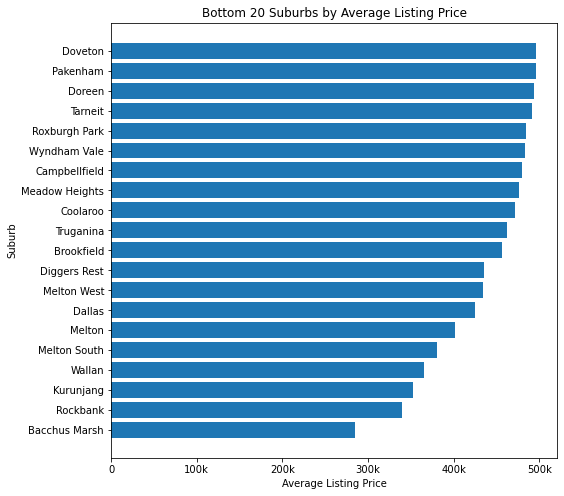

In [141]:
# get bottom 20 suburbs by average listing price
suburb_price = clean_df.groupby('Suburb')['Price'].mean().sort_values().head(20)
# set figure size
plt.figure(figsize=(8,8))
# plot horizontal bar chart
barh_plotter(data=suburb_price,
             title='Bottom 20 Suburbs by Average Listing Price',
             tick=(0,100000,200000,300000,400000,500000),
             label=('0','100k','200k','300k','400k','500k'),
             xlabel='Average Listing Price',
             ylabel='Suburb')

Doveton, Pakenham, Doreen, Tarneit, Roxburgh Park, Wyndham Vale, Campbellfield, Meadow Heights, Coolaroo, Truganina, Brookfield, Diggers Rest, Melton West, Melton, Dallas, Melton South, Wallan, Kurunjang, Rockbank, and Bacchus Marsh are the 20 suburbs with the lowest average listing price.

<a id='multivar'></a>
### Multivariate Analysis

#### Relationship between numeric variables and price for each type of listing

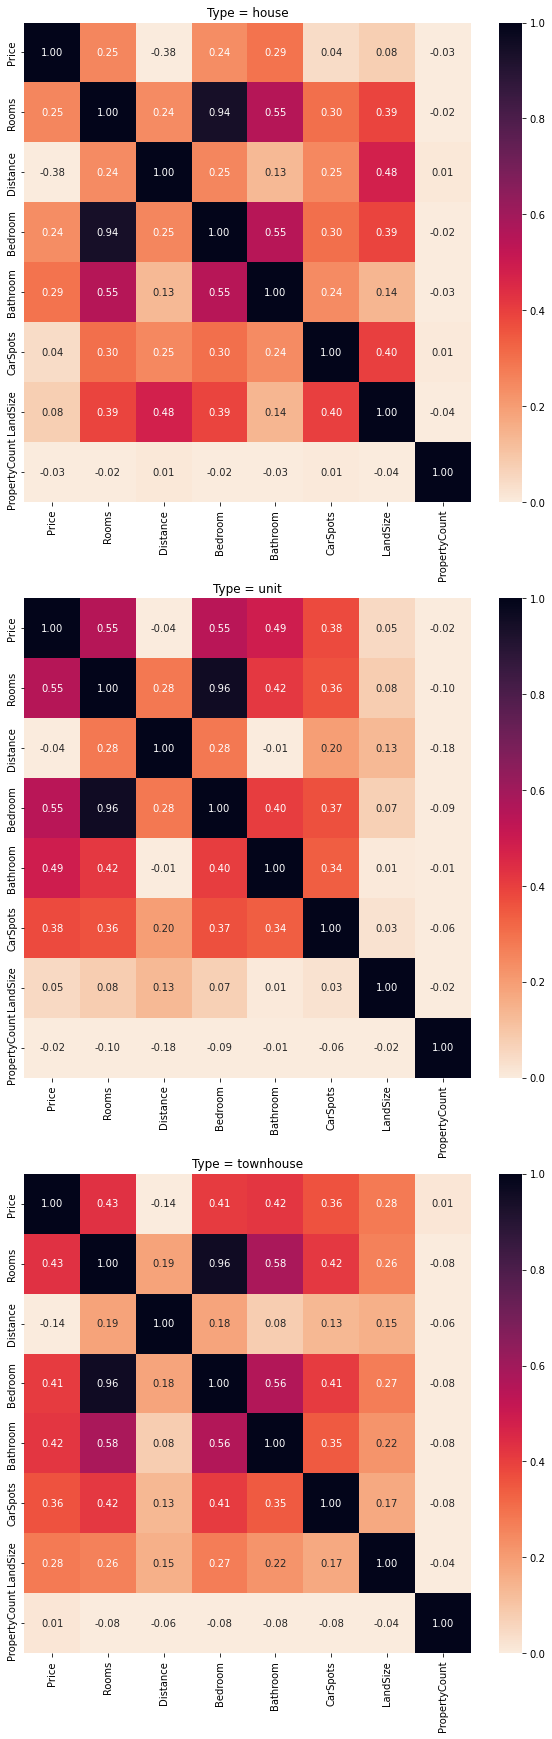

In [142]:
# list of types of listings
types = ['house','unit','townhouse']
# list of numeric columns
numeric = ['Price','Rooms','Distance','Bedroom','Bathroom','CarSpots','LandSize','PropertyCount']
# set figure size
plt.figure(figsize=(10,30))
n = 1
# iterate through type
for i in types:
    # set subplot
    plt.subplot(3,1,n)
    # plot heatmap
    sns.heatmap(clean_df[clean_df['Type'] == i][numeric].corr(),
                cmap='rocket_r',annot=True,fmt='.2f',vmin=0)
    # add title
    plt.title(f'Type = {i}')
    # add 1 to n
    n += 1

The positive relationship between number of rooms and price, number of bedrooms and price and number of bathrooms and price is weaker in houses than in units and townhouses. Also, distance has a stronger negative relationship with price for houses than for units and townhouses. With units, the relationship almost doesn't exist while with townhouses it's a weak negative relationship.


#### Relationship between numeric variables and price in each region

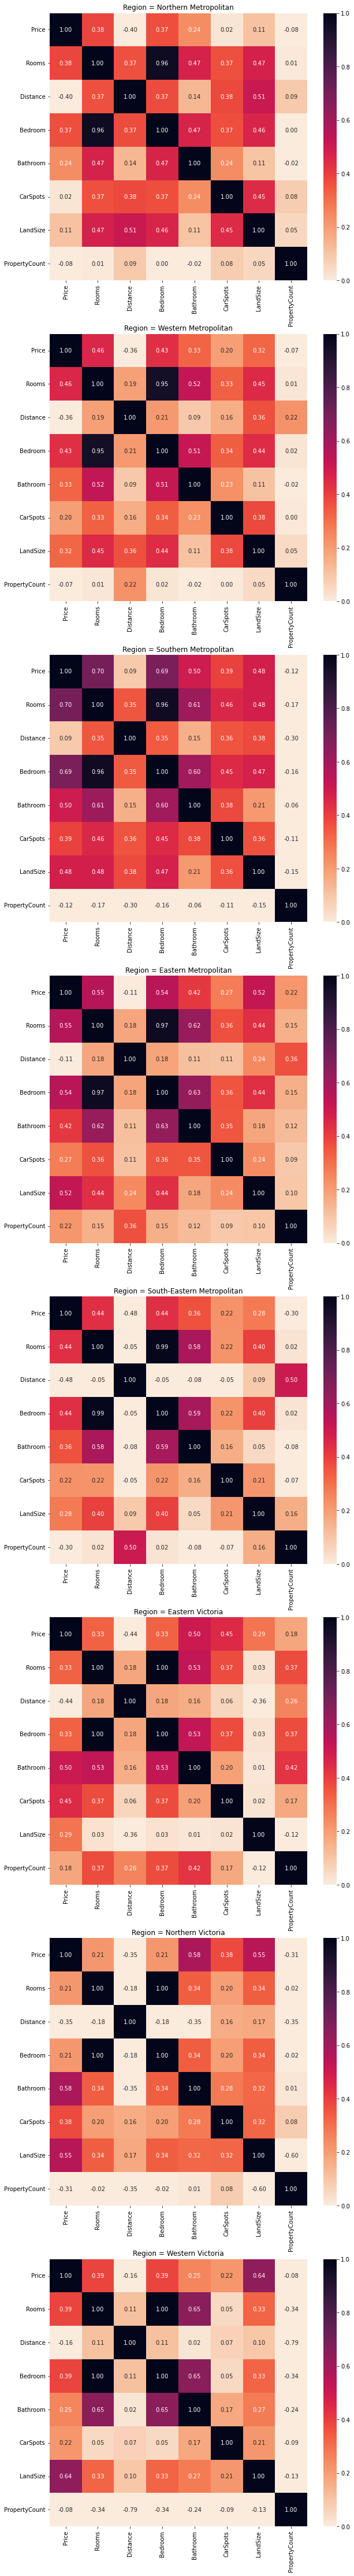

In [143]:
# list of regions
regions = ['Northern Metropolitan', 'Western Metropolitan','Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria', 'Northern Victoria', 'Western Victoria']
# set figure size
plt.figure(figsize=(10,80))
n = 1
# iterate through list of regions
for i in regions:
    # set subplot
    plt.subplot(8,1,n)
    # plot heatmap
    sns.heatmap(clean_df[clean_df['RegionName'] == i][numeric].corr(),
                cmap='rocket_r',annot=True,fmt='.2f',vmin=0)
    # add title
    plt.title(f'Region = {i}')
    # add 1 to n
    n += 1

#### Average price of listing type by region

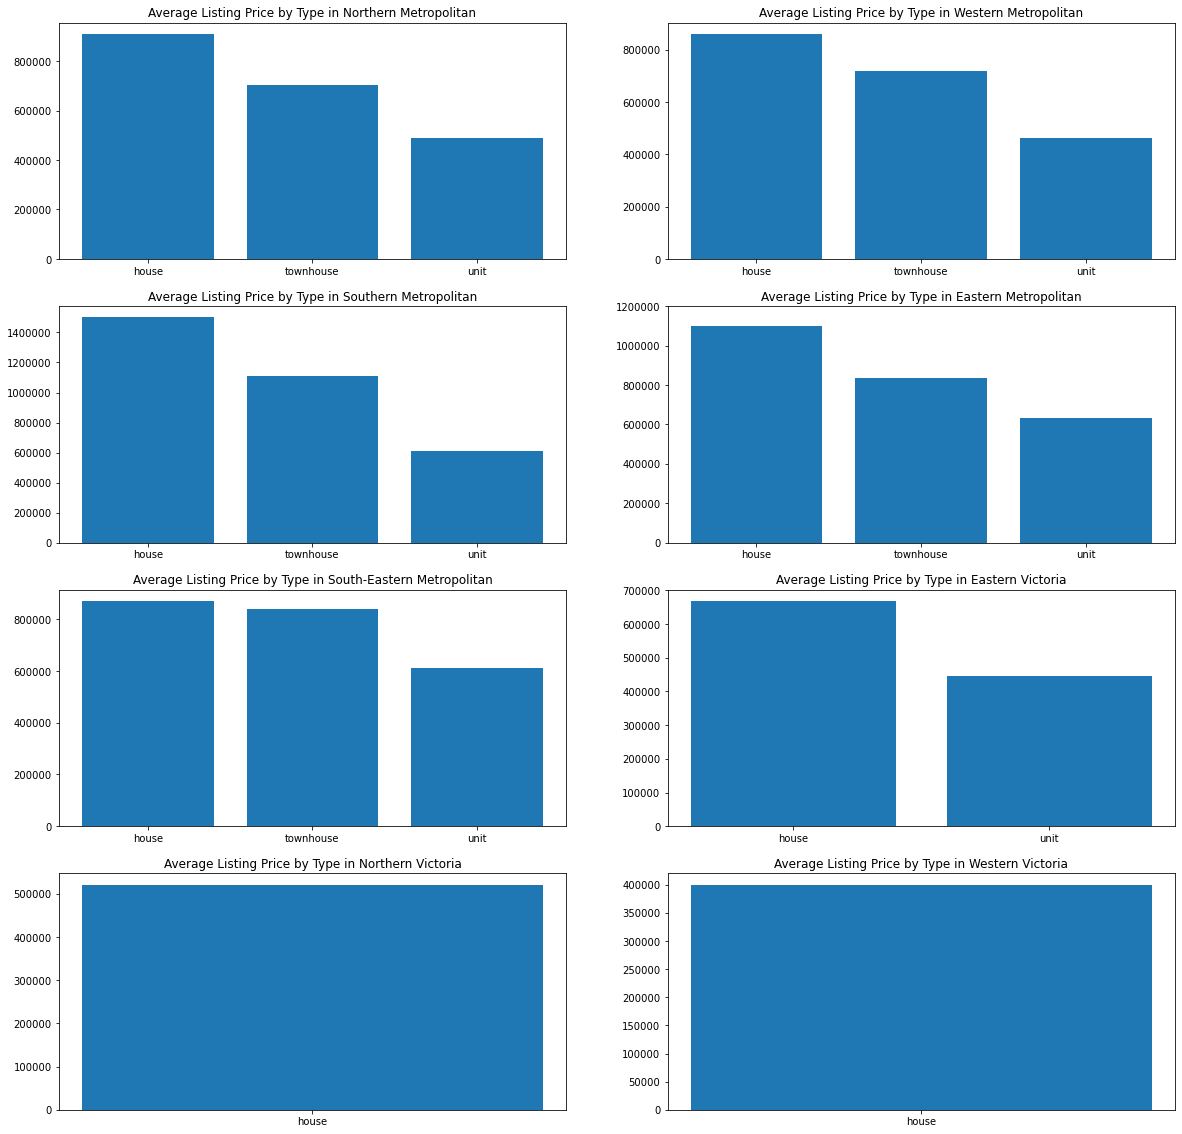

In [149]:
plt.figure(figsize=(20,20))
n = 1
for region in regions:
    plt.subplot(4,2,n)
    type_means = clean_df[clean_df['RegionName'] == region].groupby('Type')['Price'].median()
    plt.bar(type_means.index,type_means)
    plt.title(f'Average Listing Price by Type in {region}')
    if n == 3:
        plt.yticks(ticks = (0,200000,400000,600000,800000,1000000,1200000,1400000),
              labels = (0,200000,400000,600000,800000,1000000,1200000,1400000))
    elif n == 4:
        plt.yticks(ticks = (0,200000,400000,600000,800000,1000000,1200000),
              labels = (0,200000,400000,600000,800000,1000000,1200000))
    n += 1

In 5 regions in the Metropolitan area, houses are more expensive than townhouses which are also more expensive than units. In the South-Eastern Metropolitan, there's not much difference between the price of houses and that of townhouses.

In the Victoria area, there are no townhouse listings and only Eastern Victoria has unit listings.  

<a id='conclude'></a>  
## Conclusion

##### Entire Melbourne Area

The drivers of price are number of rooms, number of bedrooms, number of bathrooms and landsize. When these things increase, the price of the listing increase. Also, there is weak negative relationship between distance from central business district and price therefore the farther away a listing is from CBD reduces its price by a small margin.

Houses are more expensive than townhouses and units.

Listings in the Metropolitan Area are generally more expensive than listings in the Victoria Area. The region with the most expensive listings is the Southern Metropolitan region while the region with the least expensive listings is the Western Victoria Region.

Price of houses is more negatively affected by distance from CBD than townhouses and units. Prices of units are not affected by distance from CBD.

There's a stronger positive relationship between price and rooms, price and bedrooms, price and bathrooms, price and car spots and price and land size for units and townhouses than for houses.

There are no townhouses in the Victoria area. Only the Eastern Victoria region has units in the Victoria Area.


##### Northern Metropolitan
* Rooms, bedrooms and distance are major drivers among the other variables. Rooms and bedrooms have a positive relationship with price while distance from CBD has a negative relationship with price.

##### Western Metropolitan
Positive drivers: rooms, bedrooms, bathrooms and land size
Negative drivers: distance from CBD

##### Southern Metropolitan
Positive drivers: rooms, bedrooms, bathroom, car spots and land size

##### Eastern Metropolitan
Positive drivers: rooms, bedrooms, bathrooms and land size

##### South Eastern Metropolitan
Positive drivers: rooms, bedrooms, and bathrooms
Negative drivers: distance from CBD

##### Eastern Victoria
Positive drivers: bathrooms, carspots, bedrooms and rooms
Negative drivers: distance from CBD

##### Northern Victoria
Positive drivers: Bathroom, Car spots and land size
Negative drivers: Property counts and distance from CBD

##### Western Victoria
Positive drivers: Land size, bedrooms and rooms


### Limitations
The analysis excluded certain variables because they had some missing values. However, these variables could have an effect on price. Therefore the conclusions drawn are based on the variables used in the analysis and not necessarily all the variables in the data.

